# Global Power plant 

Fuel Type Aggregation We define the "Fuel Type" attribute of our database based on common fuel categories. Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw



In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [172]:
df=pd.read_csv("/Users/rekhagrg/Downloads/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA,Preprocessing and Feature Engineering

In [173]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [174]:
print(df.describe())

       capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   907.000000  861.000000  861.000000          0.0          527.000000   
mean    326.223755   21.197918   77.464907          NaN         1997.091082   
std     590.085456    6.239612    4.939316          NaN           17.082868   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.725000   16.773900   74.256200          NaN         1988.000000   
50%      59.200000   21.780000   76.719500          NaN         2001.000000   
75%     385.250000   25.512400   79.440800          NaN         2012.000000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  519.0                  0.0   
mean       NaN                 2019.0                  NaN   
std        NaN                    0.0                  NaN   
min        NaN                 2019.0   

In [175]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [176]:
# Drop unnecessary columns
df = df.drop(['country', 'country_long', 'name', 'gppd_idnr', 'generation_data_source', 'wepp_id', 'year_of_capacity_data', 
              'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 
              'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh'], axis=1)

In [177]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['fuel_type_encoded'] = label_encoder.fit_transform(df['primary_fuel'])

# Build and Test multiple Models 

In [146]:
# Separate features and target variables
X = df.drop(['primary_fuel', 'capacity_mw'], axis=1)
y_fuel = df['fuel_type_encoded']

# Check the size of the dataset
data_size = len(df)
print("Dataset size:", data_size)

# Adjust test_size based on the dataset size
test_size = 0.2 if data_size >= 5 else 1.0  

# Split the data into training and testing sets
X_train, X_test, y_fuel_train, y_fuel_test, y_capacity_train, y_capacity_test = train_test_split(
    X, y_fuel, y_capacity, test_size=test_size, random_state=42)


Dataset size: 907


# Model 1: Random Forest Classifier for Fuel Type

In [150]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [152]:
# Combine training and testing data to ensure consistent encoding
combined_data = pd.concat([X_train, X_test])

In [153]:
# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
combined_encoded = encoder.fit_transform(combined_data[categorical_columns])


In [154]:
# Split the combined data back into training and testing sets
X_train_encoded = pd.DataFrame(combined_encoded[:len(X_train)])
X_test_encoded = pd.DataFrame(combined_encoded[len(X_train):])

In [155]:
# Model 1: Random Forest Classifier for Fuel Type
fuel_model = RandomForestClassifier(random_state=42)
fuel_model.fit(X_train_encoded, y_fuel_train)
y_fuel_pred = fuel_model.predict(X_test_encoded)


In [156]:
# Evaluate the model for Fuel Type
fuel_accuracy = accuracy_score(y_fuel_test, y_fuel_pred)
print(f"Fuel Type Model Accuracy: {fuel_accuracy}")

Fuel Type Model Accuracy: 0.8351648351648352


# For capacity:RandomForestRegressor

In [163]:
# Separate features and target variables
X = df.drop(['primary_fuel', 'capacity_mw'], axis=1)
y_capacity = df['capacity_mw']

# Check the size of the dataset
data_size = len(df)
print("Dataset size:", data_size)

# Adjust test_size based on the dataset size
test_size = 0.2 if data_size >= 5 else 1.0  # You can adjust this based on your dataset size

# Split the data into training and testing sets
X_train, X_test, y_capacity_train, y_capacity_test = train_test_split(
    X, y_capacity, test_size=test_size, random_state=42)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Combine training and testing data to ensure consistent encoding
combined_data = pd.concat([X_train, X_test])

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
combined_encoded = encoder.fit_transform(combined_data[categorical_columns])

# Split the combined data back into training and testing sets
X_train_encoded = pd.DataFrame(combined_encoded[:len(X_train)])
X_test_encoded = pd.DataFrame(combined_encoded[len(X_train):])



Dataset size: 907


# Model 2: Random Forest Regressor for Capacity(RMSE)

In [162]:
# Model 2: Random Forest Regressor for Capacity
capacity_model = RandomForestRegressor(random_state=42)
capacity_model.fit(X_train_encoded, y_capacity_train)
y_capacity_pred = capacity_model.predict(X_test_encoded)

# Evaluate the model for Capacity
capacity_rmse = mean_squared_error(y_capacity_test, y_capacity_pred, squared=False)
print(f"Capacity Model RMSE: {capacity_rmse}")


Capacity Model RMSE: 428.04841145909563


So In summary from above result:
 1.Capacity Model RMSE(Root mean squared Eror):428.05
 2.Fuel Type Model Accuracy :83.52%

In [164]:
# Access feature importances for the Capacity model
feature_importances_capacity = capacity_model.feature_importances_
print("Feature Importances for Capacity Model:")
print(feature_importances_capacity)

# Access feature importances for the Fuel Type model
feature_importances_fuel = fuel_model.feature_importances_
print("\nFeature Importances for Fuel Type Model:")
print(feature_importances_fuel)


Feature Importances for Capacity Model:
[3.64865369e-04 8.93311925e-01 8.99957033e-03 3.19845409e-06
 4.43809852e-07 2.06572171e-06 9.68226141e-09 7.56337747e-09
 1.08168015e-05 6.09740888e-04 2.78296772e-09 5.65619524e-09
 9.69726221e-09 3.30538421e-09 1.06787416e-06 6.65187195e-09
 6.30942321e-09 1.99525648e-08 1.61828451e-08 2.03382193e-09
 3.52970232e-06 0.00000000e+00 0.00000000e+00 4.44710461e-06
 5.79133129e-07 2.47043569e-08 6.91549329e-08 0.00000000e+00
 1.72533103e-05 2.88031507e-07 1.48892558e-07 0.00000000e+00
 9.85513203e-06 1.03183419e-06 1.35401002e-07 3.09982642e-06
 9.06112385e-08 0.00000000e+00 1.04803232e-04 3.79051240e-07
 1.37876960e-08 1.02313898e-08 1.05176193e-08 9.08154609e-08
 1.16287871e-23 7.86902271e-07 3.26129584e-07 0.00000000e+00
 3.17350857e-05 8.25275753e-07 4.42218807e-04 1.83723072e-08
 2.03982378e-07 2.02188045e-08 5.65237669e-08 0.00000000e+00
 0.00000000e+00 5.23189692e-08 1.94788523e-08 5.23566733e-07
 5.70768350e-07 9.38910390e-24 1.23828061e-08

# Learning Curves

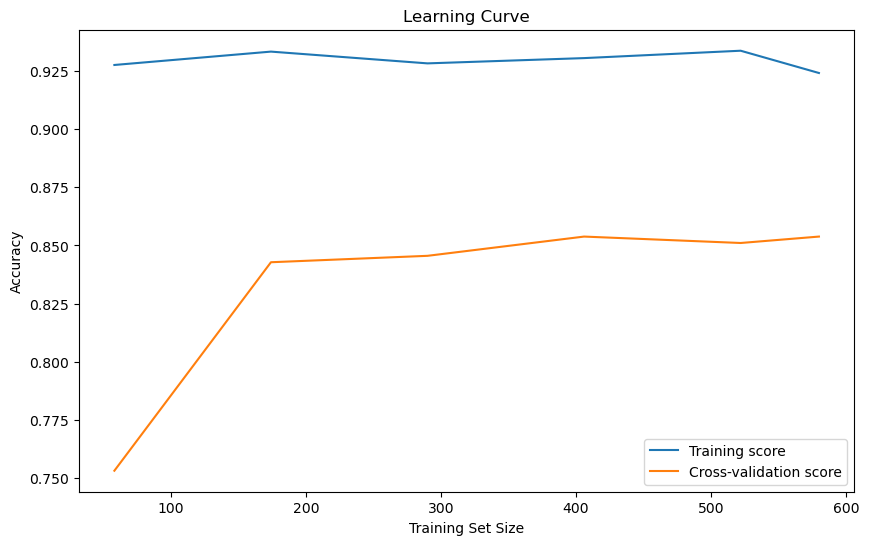

/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/rekhagrg/opt/anaconda3/lib/python3.

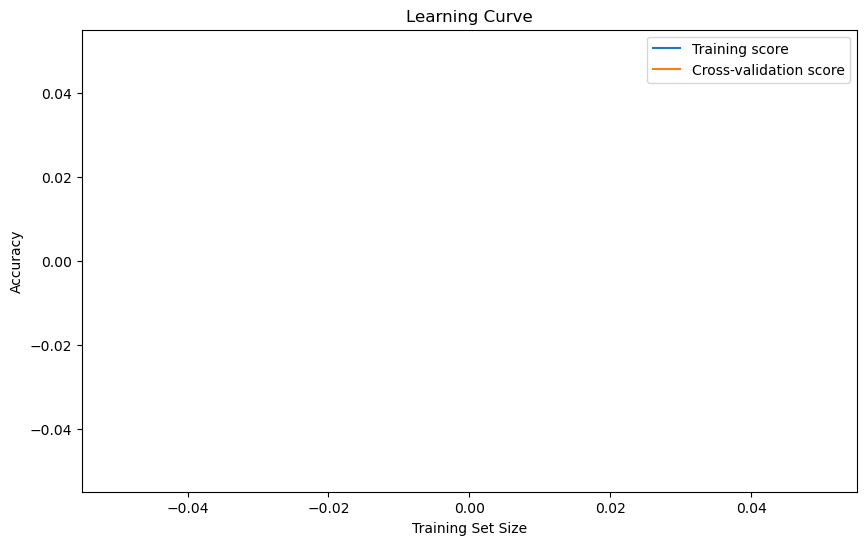

In [168]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv, train_sizes):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy"  # Use appropriate scoring for your problem
    )

    train_scores_mean = train_scores.mean(axis=1)
    validation_scores_mean = validation_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training score")
    plt.plot(train_sizes, validation_scores_mean, label="Cross-validation score")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")  # Update with the appropriate metric for your problem
    plt.title("Learning Curve")
    plt.legend()
    plt.show()

# Define the training sizes you want to use
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

# Plot learning curve for Fuel Type Model
plot_learning_curve(fuel_model, X_train_encoded, y_fuel_train, cv=5, train_sizes=train_sizes)

# Plot learning curve for Capacity Model
plot_learning_curve(capacity_model, X_train_encoded, y_capacity_train, cv=5, train_sizes=train_sizes)


# Cross-validation score

In [169]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores for Fuel Type Model
fuel_cv_scores = cross_val_score(fuel_model, X_train_encoded, y_fuel_train, cv=5, scoring="accuracy")
print("Cross-Validation Scores for Fuel Type Model:", fuel_cv_scores)

# Cross-validation scores for Capacity Model
capacity_cv_scores = cross_val_score(capacity_model, X_train_encoded, y_capacity_train, cv=5, scoring="neg_mean_squared_error")
capacity_cv_rmse_scores = np.sqrt(-capacity_cv_scores)
print("Cross-Validation RMSE Scores for Capacity Model:", capacity_cv_rmse_scores)


Cross-Validation Scores for Fuel Type Model: [0.85517241 0.85517241 0.84827586 0.86206897 0.84827586]
Cross-Validation RMSE Scores for Capacity Model: [566.43759744 450.85256983 320.17070405 496.159815   407.0778351 ]


# Hyper Parameter Tuning

In [170]:
from sklearn.model_selection import GridSearchCV

# Example grid for hyperparameter tuning for Fuel Type Model
param_grid_fuel = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search_fuel = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_fuel, cv=5, scoring="accuracy")
grid_search_fuel.fit(X_train_encoded, y_fuel_train)

# Example grid for hyperparameter tuning for Capacity Model
param_grid_capacity = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search_capacity = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_capacity, cv=5, scoring="neg_mean_squared_error")
grid_search_capacity.fit(X_train_encoded, y_capacity_train)

# Print best hyperparameters
print("Best Hyperparameters for Fuel Type Model:", grid_search_fuel.best_params_)
print("Best Hyperparameters for Capacity Model:", grid_search_capacity.best_params_)


Best Hyperparameters for Fuel Type Model: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Hyperparameters for Capacity Model: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


# Visualization 

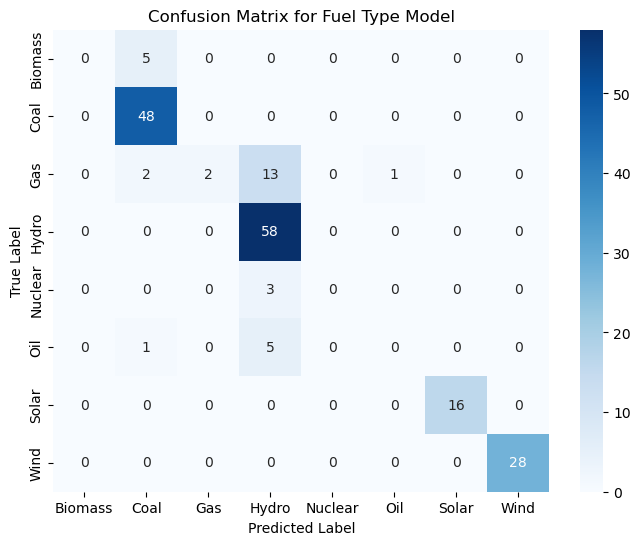

In [167]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for the Fuel Type model
fuel_conf_matrix = confusion_matrix(y_fuel_test, y_fuel_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(fuel_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Fuel Type Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
